In [1]:
#importing data
import pandas as pd

covid_world=pd.read_csv('C:\\Users\\sree2\\OneDrive\\Desktop\\time_covid.csv',header=0)
covid_world.head()



,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25


In [2]:
#imports

import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np




In [ ]:
#test map
folium.Map()

In [3]:
#necessary imports
import os
os.environ['PROJ_LIB'] = r'C:\Users\sree2\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
#scatter plot using basemap

my_dpi=96
fig=plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.1)
m.drawcoastlines(linewidth=0.8, color="white")
 
covid_world['labels_enc'] = pd.factorize(covid_world['Country'])[0]
 
# Add a point per position
#s=covid_world['1/22/20']
m.scatter(covid_world['Long'], covid_world['Lat'], s=covid_world[covid_world.columns[96]], alpha=0.9, c=covid_world['labels_enc'], cmap="Set1")
m


In [11]:
#main map
import folium
import os
import time
from selenium import webdriver

m = folium.Map(location=[20,30], tiles="CartoDB Positron", zoom_start=2.4)

# add markers
for j in range(88,96):
    for i in range(0,len(covid_world)):
        if (covid_world.iloc[i][j]):
            folium.CircleMarker(
            location=[covid_world.iloc[i]['Lat'], covid_world.iloc[i]['Long']],
            tooltip=covid_world.iloc[i][j],
            radius=1,
            color="red",
            fill=True,
            fill_color='red',
        ).add_to(m)
    folium.Marker(
        location=[75,0],
        icon=plugins.BeautifyIcon
        (number=covid_world.columns[j],
         icon_shape="rectangle",
         border_width=0,
         text_color='red',
        inner_icon_style='font-size:40px;')
        ).add_to(m)
    folium.Marker(
        location=[-40,-140],
        icon=plugins.BeautifyIcon
        (number="Covid Time Series",
         icon_shape="rectangle",
         border_width=0,
         text_color='black',
        inner_icon_style='font-size:20px;')
        ).add_to(m)
    delay=5
    fn=str(j)+'map.html'
    tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
    m.save(fn)
    browser = webdriver.Firefox()
    browser.get(tmpurl)
    #Give the map tiles some time to load
    time.sleep(delay)
    browser.save_screenshot(str(j)+'map.png')
    browser.quit()
    os.remove(fn)
    
            
    
  
    



In [ ]:
#test
m = folium.Map(location=[20,30], tiles="CartoDB Positron", zoom_start=2.4)
j=3
for i in range(0,len(covid_world)):
        if (covid_world.iloc[i]['4/23/20']):
            folium.Marker(
            location=[covid_world.iloc[i]['Lat'], covid_world.iloc[i]['Long']],
            icon=plugins.BeautifyIcon(number=float(covid_world.iloc[i]['4/23/20']),border_width=0.5,spin=True),
            tooltip=covid_world.iloc[i]['4/23/20']
        ).add_to(m)
            
folium.Marker(
        location=[75,0],
        icon=plugins.BeautifyIcon(number=covid_world.columns[3],icon_shape="rectangle",border_width=0,text_color='red',
                                  inner_icon_style='font-size:40px;padding-top:-5px;')
        ).add_to(m)
            
            
        

m
m.save('map.html')



In [5]:
#test
import os
import time
from selenium import webdriver


j=4
m = folium.Map(location=[20,30], tiles="CartoDB Positron", zoom_start=2.4)
for i in range(0,len(covid_world)):
    if (covid_world.iloc[i][j]):
        folium.CircleMarker(
        location=[covid_world.iloc[i]['Lat'], covid_world.iloc[i]['Long']],
        tooltip=covid_world.iloc[i][j],
        radius=1,
        color="red",
        fill=True,
        fill_color='red',
        ).add_to(m)
    folium.Marker(
        location=[75,0],
        icon=plugins.BeautifyIcon
        (number=covid_world.columns[j],
         icon_shape="rectangle",
         border_width=0,
         text_color='red',
        inner_icon_style='font-size:40px;')
        ).add_to(m)
    folium.Marker(
        location=[-40,-140],
        icon=plugins.BeautifyIcon
        (number="Covid Time Series",
         icon_shape="rectangle",
         border_width=0,
         text_color='black',
        inner_icon_style='font-size:20px;')
        ).add_to(m)



delay=5
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map.png')
browser.quit()

In [48]:
import pandas as pd
covid_india=pd.read_excel('C:\\Users\\sree2\\OneDrive\\Desktop\\complete_month.xlsx',header=0)
covid_india


,Month,Total Cases,Cured/Discharged,Deaths
0,Jan,2,0,0
1,Feb,86,0,0
2,Mar,9385,805,202
3,Apr,290539,44255,9152


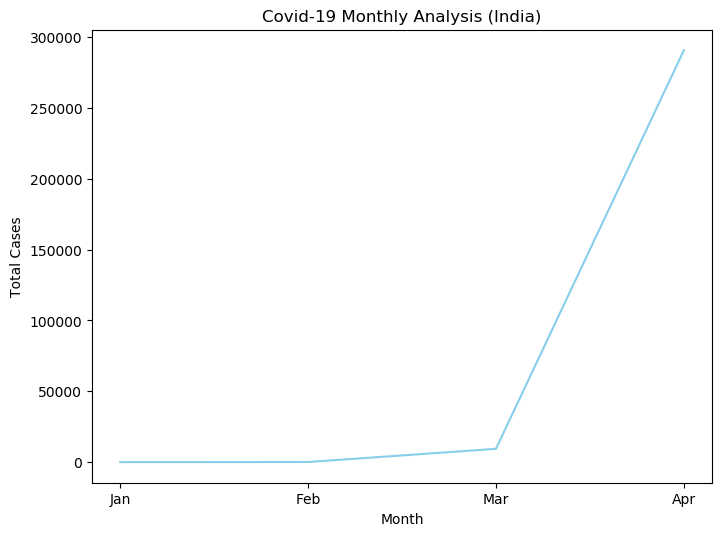

In [91]:
import matplotlib.pyplot as plt

fig  = plt.figure(figsize=(8,6),facecolor = 'white', dpi=100)
plt.savefig('test.png', dpi=100)

tot_cases=covid_india['Total Cases'].tolist()
Date=covid_india['Month'].tolist()

plt.plot(Date,tot_cases,color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Covid-19 Monthly Analysis (India)')
plt.savefig('covid_month')

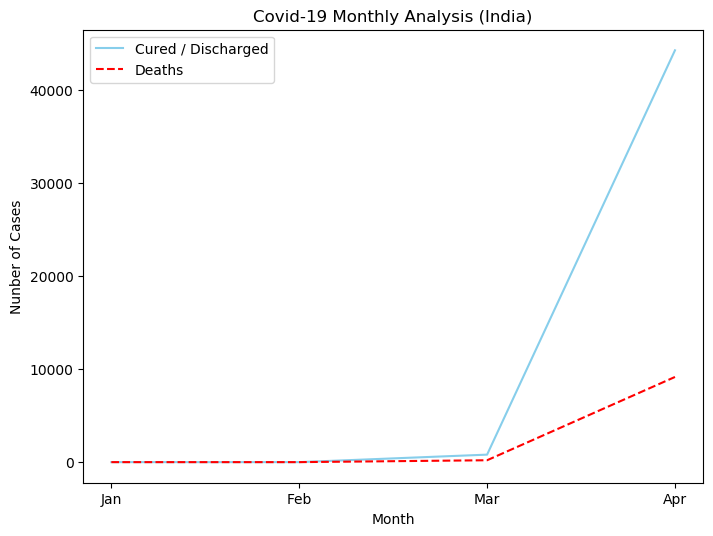

In [92]:
Cured=covid_india['Cured/Discharged'].tolist()
Deaths=covid_india['Deaths'].tolist()

fig  = plt.figure(figsize=(8,6),facecolor = 'white', dpi=100)
plt.savefig('test.png', dpi=100)
plt.plot(Date, Cured, color='skyblue',linestyle='-',label='Cured / Discharged')
plt.plot(Date, Deaths, color='red',linestyle='--',label='Deaths')

plt.xlabel('Month')
plt.ylabel('Nunber of Cases')
plt.title('Covid-19 Monthly Analysis (India)')
plt.legend()
plt.savefig('covid_month_cd')

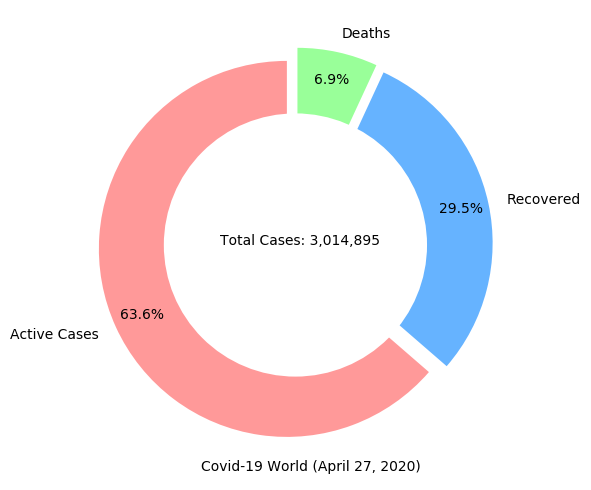

In [3]:
import matplotlib.pyplot as plt


# Pie chart
fig  = plt.figure(figsize=(6,5),facecolor = 'white', dpi=100)
labels = ['Active Cases', 'Recovered', 'Deaths']
sizes = [1918421,888543,207931]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
plt.text(-0.4, 0, "Total Cases: 3,014,895")
plt.text(-0.5, -1.2, "Covid-19 World (April 27, 2020)")
#plt.title('Covid-19 World (August 27, 2020)')
plt.savefig('covid_world_pie')

In [129]:
import pandas as pd
covid_india=pd.read_excel('C:\\Users\\sree2\\OneDrive\\Desktop\\world_covid19.xlsx',header=0)
covid_india

,Country,Total Cases,New Cases,Total deaths,New deaths,Total Recovered,Active,"Serious,",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,World,3015373,22111.0,207933.0,1018.0,888547.0,1918893,57539.0,387.00,26.7,NaN,NaN
1,USA,987916,756.0,55425.0,12.0,118781.0,813710,15143.0,2985.00,167.0,5476021.0,16544.0
2,Spain,229422,2793.0,23521.0,331.0,120832.0,85069,7764.0,4907.00,503.0,1345560.0,28779.0
3,Italy,197675,NaN,26644.0,NaN,64928.0,106103,2009.0,3269.00,441.0,1757659.0,29071.0
4,France,162100,NaN,22856.0,NaN,44903.0,94341,4682.0,2483.00,350.0,463662.0,7103.0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Sao Tome and Principe,4,NaN,NaN,NaN,NaN,4,NaN,18.00,NaN,19.0,87.0
210,Anguilla,3,NaN,NaN,NaN,3.0,0,NaN,200.00,NaN,NaN,NaN
211,Saint Pierre Miquelon,1,NaN,NaN,NaN,NaN,1,NaN,173.00,NaN,NaN,NaN
212,Yemen,1,NaN,NaN,NaN,1.0,0,NaN,0.03,NaN,120.0,4.0


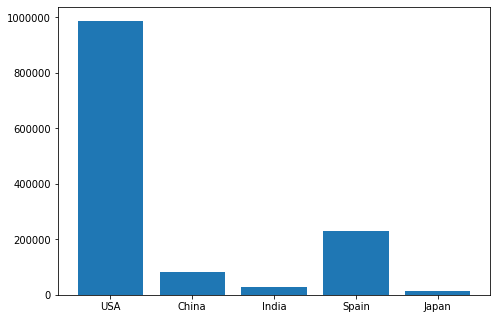

In [133]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
country = ['USA', 'China', 'India', 'Spain', 'Japan']
dat = [987916,82830,28380,229422,13441]
ax.bar(country,data)
plt.show()

In [41]:
import pandas as pd
covid=pd.read_csv('C:\\Users\\sree2\\OneDrive\\Desktop\\covid.csv',header=0)
covid

,Row Labels,1/22/20,1/29/20,2/5/20,2/12/20,2/19/20,2/26/20,3/4/20,3/11/20,3/18/20,3/25/20,4/1/20,4/8/20,4/15/20,4/22/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,22.0,84.0,237.0,444.0,784.0,1176.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,59.0,146.0,259.0,400.0,494.0,634.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,1.0,12.0,20.0,74.0,302.0,847.0,1572.0,2160.0,2910.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,39.0,188.0,390.0,564.0,673.0,723.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,19.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
183,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,36.0,39.0,48.0,74.0
184,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,11.0,23.0,28.0
185,(blank),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
covid1=covid.values.tolist()
covid1

[['Afghanistan',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  7.0,
  22.0,
  84.0,
  237.0,
  444.0,
  784.0,
  1176.0],
 ['Albania',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  59.0,
  146.0,
  259.0,
  400.0,
  494.0,
  634.0],
 ['Algeria',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  12.0,
  20.0,
  74.0,
  302.0,
  847.0,
  1572.0,
  2160.0,
  2910.0],
 ['Andorra',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  39.0,
  188.0,
  390.0,
  564.0,
  673.0,
  723.0],
 ['Angola',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  8.0,
  19.0,
  19.0,
  25.0],
 ['Antigua and Barbuda',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  3.0,
  7.0,
  19.0,
  23.0,
  24.0],
 ['Argentina',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  19.0,
  79.0,
  387.0,
  1054.0,
  1715.0,
  2443.0,
  3144.0],
 ['Armenia',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  84.0,
  265.0,
  571.0,
  881.0,
  1111.0,
  1473.0],
 [

In [ ]:
import matplotlib.pyplot as plt

fig  = plt.figure(figsize=(8,6),facecolor = 'white', dpi=100)
plt.savefig('test.png', dpi=100)

plt.plot(Date,tot_cases,color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Covid-19 Monthly Analysis (India)')
plt.savefig('covid_month')

In [43]:
dates=covid.columns.values.tolist()
dates

['Row Labels',
 '1/22/20',
 '1/29/20',
 '2/5/20',
 '2/12/20',
 '2/19/20',
 '2/26/20',
 '3/4/20',
 '3/11/20',
 '3/18/20',
 '3/25/20',
 '4/1/20',
 '4/8/20',
 '4/15/20',
 '4/22/20']

In [44]:
dates.pop(0)
dates

['1/22/20',
 '1/29/20',
 '2/5/20',
 '2/12/20',
 '2/19/20',
 '2/26/20',
 '3/4/20',
 '3/11/20',
 '3/18/20',
 '3/25/20',
 '4/1/20',
 '4/8/20',
 '4/15/20',
 '4/22/20']

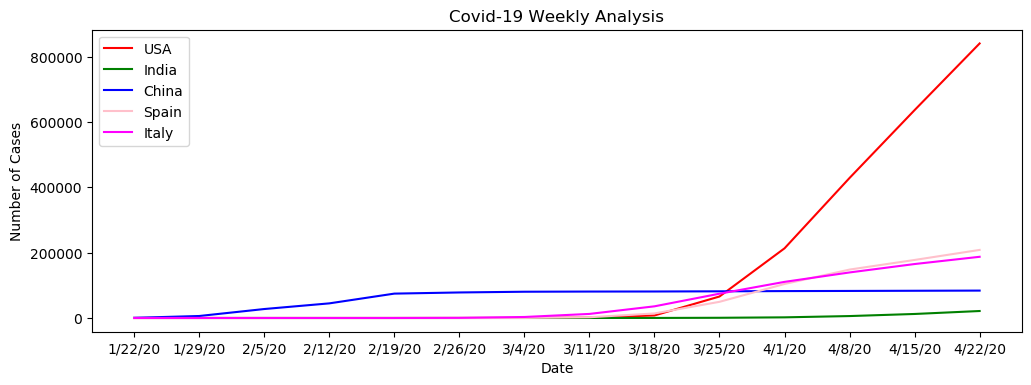

In [45]:
import matplotlib.pyplot as plt
fig  = plt.figure(figsize=(12,4),facecolor = 'white', dpi=100)
plt.savefig('test.png', dpi=100)

for i in range(0,len(covid1)):
    if(covid1[i][0]=='US'):
        usa=covid1[i][1:]
    if(covid1[i][0]=='India'):
        india=covid1[i][1:]
    if(covid1[i][0]=='China'):
        china=covid1[i][1:]
    if(covid1[i][0]=='Spain'):
        spain=covid1[i][1:]
    if(covid1[i][0]=='Italy'):
        italy=covid1[i][1:]
    
        
    
    
plt.plot(dates, usa, color='red',label='USA')

plt.plot(dates, india, color='green',label='India')

plt.plot(dates, china, color='blue',label='China')

plt.plot(dates, spain, color='pink',label='Spain')

plt.plot(dates, italy, color='magenta',label='Italy')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Covid-19 Weekly Analysis')
plt.legend()
plt.savefig('covid_world_comp')

In [57]:
import pandas as pd
covid=pd.read_excel('C:\\Users\\sree2\\OneDrive\\Desktop\\tot_r_d.xlsx',header=0)
covid


,Country,1/22/20,1/29/20,2/5/20,2/12/20,2/19/20,2/26/20,3/4/20,3/11/20,3/18/20,3/25/20,4/1/20,4/8/20,4/15/20,4/22/20
0,US_t,1,5,11,12,13,57,149,1281,7783,65778,213242,428654,636350,840351
1,US_r,0,0,0,3,3,6,7,8,105,361,8474,23559,52096,77366
2,US_d,0,0,0,0,0,0,11,36,118,942,4760,14704,28338,46622
3,China_t,548,6087,27440,44759,74619,78166,80386,80921,81102,81661,82361,82809,83356,83868
4,China_r,28,120,1115,5082,15962,30084,50001,61644,69755,73773,76405,77567,78311,77861
5,China_d,17,133,563,1117,2116,2717,2983,3161,3241,3285,3316,3337,3346,4636
6,India_t,0,0,3,3,3,3,28,62,156,657,1998,5916,12322,21370
7,India_r,0,0,0,0,3,3,3,4,14,43,148,506,1432,4370
8,India_d,0,0,0,0,0,0,0,1,3,12,58,178,405,681
9,"Korea, South_t",1,4,19,28,31,1261,5621,7755,8413,9137,9887,10384,10591,10694


In [58]:
covid=covid.values.tolist()
covid

[['US_t',
  1,
  5,
  11,
  12,
  13,
  57,
  149,
  1281,
  7783,
  65778,
  213242,
  428654,
  636350,
  840351],
 ['US_r', 0, 0, 0, 3, 3, 6, 7, 8, 105, 361, 8474, 23559, 52096, 77366],
 ['US_d', 0, 0, 0, 0, 0, 0, 11, 36, 118, 942, 4760, 14704, 28338, 46622],
 ['China_t',
  548,
  6087,
  27440,
  44759,
  74619,
  78166,
  80386,
  80921,
  81102,
  81661,
  82361,
  82809,
  83356,
  83868],
 ['China_r',
  28,
  120,
  1115,
  5082,
  15962,
  30084,
  50001,
  61644,
  69755,
  73773,
  76405,
  77567,
  78311,
  77861],
 ['China_d',
  17,
  133,
  563,
  1117,
  2116,
  2717,
  2983,
  3161,
  3241,
  3285,
  3316,
  3337,
  3346,
  4636],
 ['India_t', 0, 0, 3, 3, 3, 3, 28, 62, 156, 657, 1998, 5916, 12322, 21370],
 ['India_r', 0, 0, 0, 0, 3, 3, 3, 4, 14, 43, 148, 506, 1432, 4370],
 ['India_d', 0, 0, 0, 0, 0, 0, 0, 1, 3, 12, 58, 178, 405, 681],
 ['Korea, South_t',
  1,
  4,
  19,
  28,
  31,
  1261,
  5621,
  7755,
  8413,
  9137,
  9887,
  10384,
  10591,
  10694],
 ['Korea, Sou

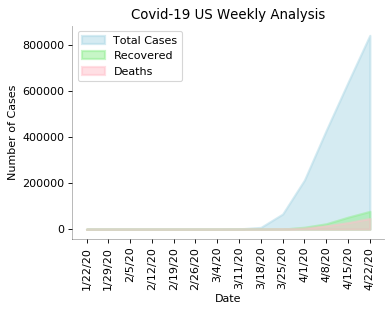

In [81]:
import matplotlib.pyplot as plt
#fig  = plt.figure(figsize=(15,15),facecolor = 'white', dpi=120)


for i in range(0,len(covid)):
    if(covid[i][0]=='US_t'):
        us_t=covid[i][1:]
    if(covid[i][0]=='US_r'):
        us_r=covid[i][1:]
    if(covid[i][0]=='US_d'):
        us_d=covid[i][1:]
   


# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(5,4), dpi= 80)
ax.fill_between(dates, us_t, y2=0, label='Total Cases', alpha=0.5, color='lightBlue', linewidth=2)
ax.fill_between(dates, us_r, y2=0, label='Recovered', alpha=0.5, color='lightgreen', linewidth=2)
ax.fill_between(dates, us_d, y2=0, label='Deaths', alpha=0.5, color='pink', linewidth=2)

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Covid-19 US Weekly Analysis')
plt.legend(loc='upper left')

plt.savefig('covid_usa',bbox_inches="tight")

plt.show()


<Figure size 1200x400 with 0 Axes>

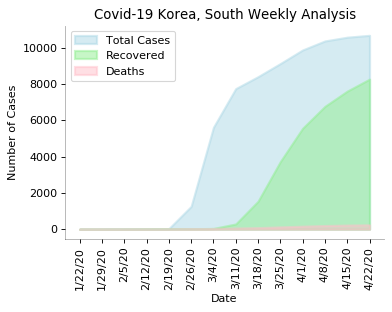

In [87]:
import matplotlib.pyplot as plt
fig  = plt.figure(figsize=(12,4),facecolor = 'white', dpi=100)


for i in range(0,len(covid)):
    if(covid[i][0]=='Korea, South_t'):
        us_t=covid[i][1:]
    if(covid[i][0]=='Korea, South_r'):
        us_r=covid[i][1:]
    if(covid[i][0]=='Korea, South_d'):
        us_d=covid[i][1:]
   


# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(5,4), dpi= 80)
ax.fill_between(dates, us_t, y2=0, label='Total Cases', alpha=0.5, color='lightBlue', linewidth=2)
ax.fill_between(dates, us_r, y2=0, label='Recovered', alpha=0.5, color='lightgreen', linewidth=2)
ax.fill_between(dates, us_d, y2=0, label='Deaths', alpha=0.5, color='pink', linewidth=2)

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Covid-19 Korea, South Weekly Analysis')
plt.legend(loc='upper left')
plt.savefig('covid_koreasouth')
plt.show()


In [88]:
import pandas as pd
covid=pd.read_csv('C:\\Users\\sree2\\OneDrive\\Desktop\\AgeGroupDetails.csv',header=0)
covid

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Unknown,9,1.30%


In [94]:
cases=[22,27,172,146,112,77,89,28,10,9]
cases

[22, 27, 172, 146, 112, 77, 89, 28, 10, 9]

In [95]:
age=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','>=80','Unknown']
age

['0-9',
 '10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '>=80',
 'Unknown']

In [122]:
import pandas as pd
covid=pd.read_csv('C:\\Users\\sree2\\OneDrive\\Desktop\\hi.csv',header=0)
covid

,Row Labels,Sum of Total Confirmed cases ( Foreign National ),Sum of Total Confirmed cases (Indian National),tot
0,Andaman and Nicobar Islands,0,17,17
1,Andhra Pradesh,0,94,94
2,Arunachal Pradesh,0,0,0
3,Assam,0,0,0
4,Bihar,0,41,41
5,Chandigarh,0,56,56
6,Chhattisgarh,0,31,31
7,Delhi,12,390,402
8,Goa,1,11,12
9,Gujarat,6,305,311


In [124]:
state=covid['tot'].values.tolist()
dat=covid['Row Labels'].values.tolist()

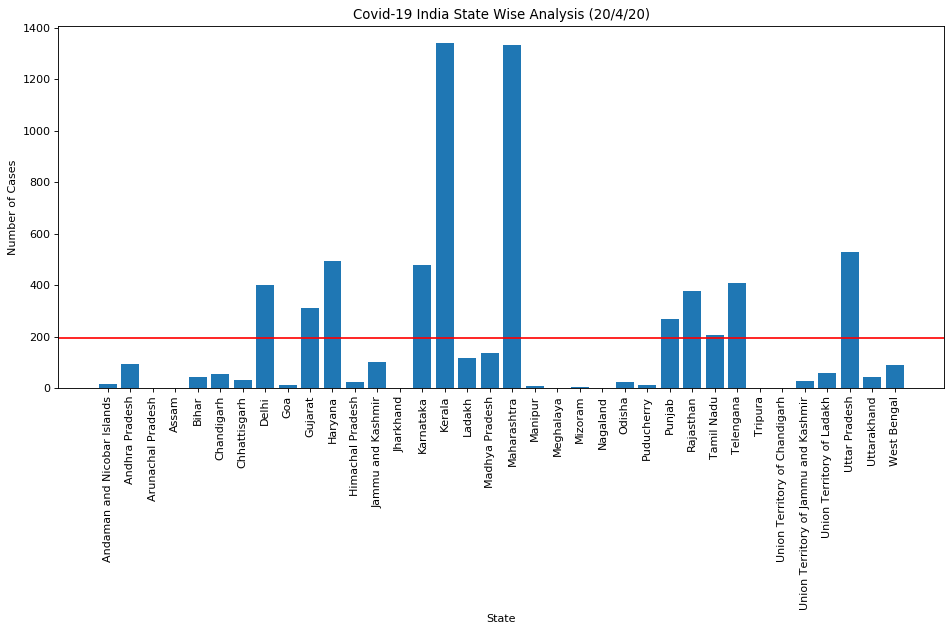

In [126]:
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi= 80)

ax.bar(dat,state)
mean = covid['tot'].mean()
ax.axhline(mean,color='red')
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.title('Covid-19 India State Wise Analysis (20/4/20)')
plt.savefig('india_state',bbox_inches="tight")
plt.show()

In [24]:
import pandas as pd
covid=pd.read_excel('C:\\Users\\sree2\\OneDrive\\Desktop\\lockdown.xlsx',header=0)
covid

,Date,Cured,Cases,Deaths
0,01-Mar,0,3,0
1,02-Mar,0,5,0
2,03-Mar,3,6,0
3,04-Mar,3,28,0
4,05-Mar,3,30,0
...,...,...,...,...
57,27-Apr,6362,28160,886
58,28-Apr,7027,29834,937
59,29-Apr,7797,31709,1008
60,30-Apr,8373,33330,1075


In [25]:
dates=covid['Date'].tolist()
cured=covid['Cured'].tolist()
cases=covid['Cases'].tolist()
deaths=covid['Deaths'].tolist()

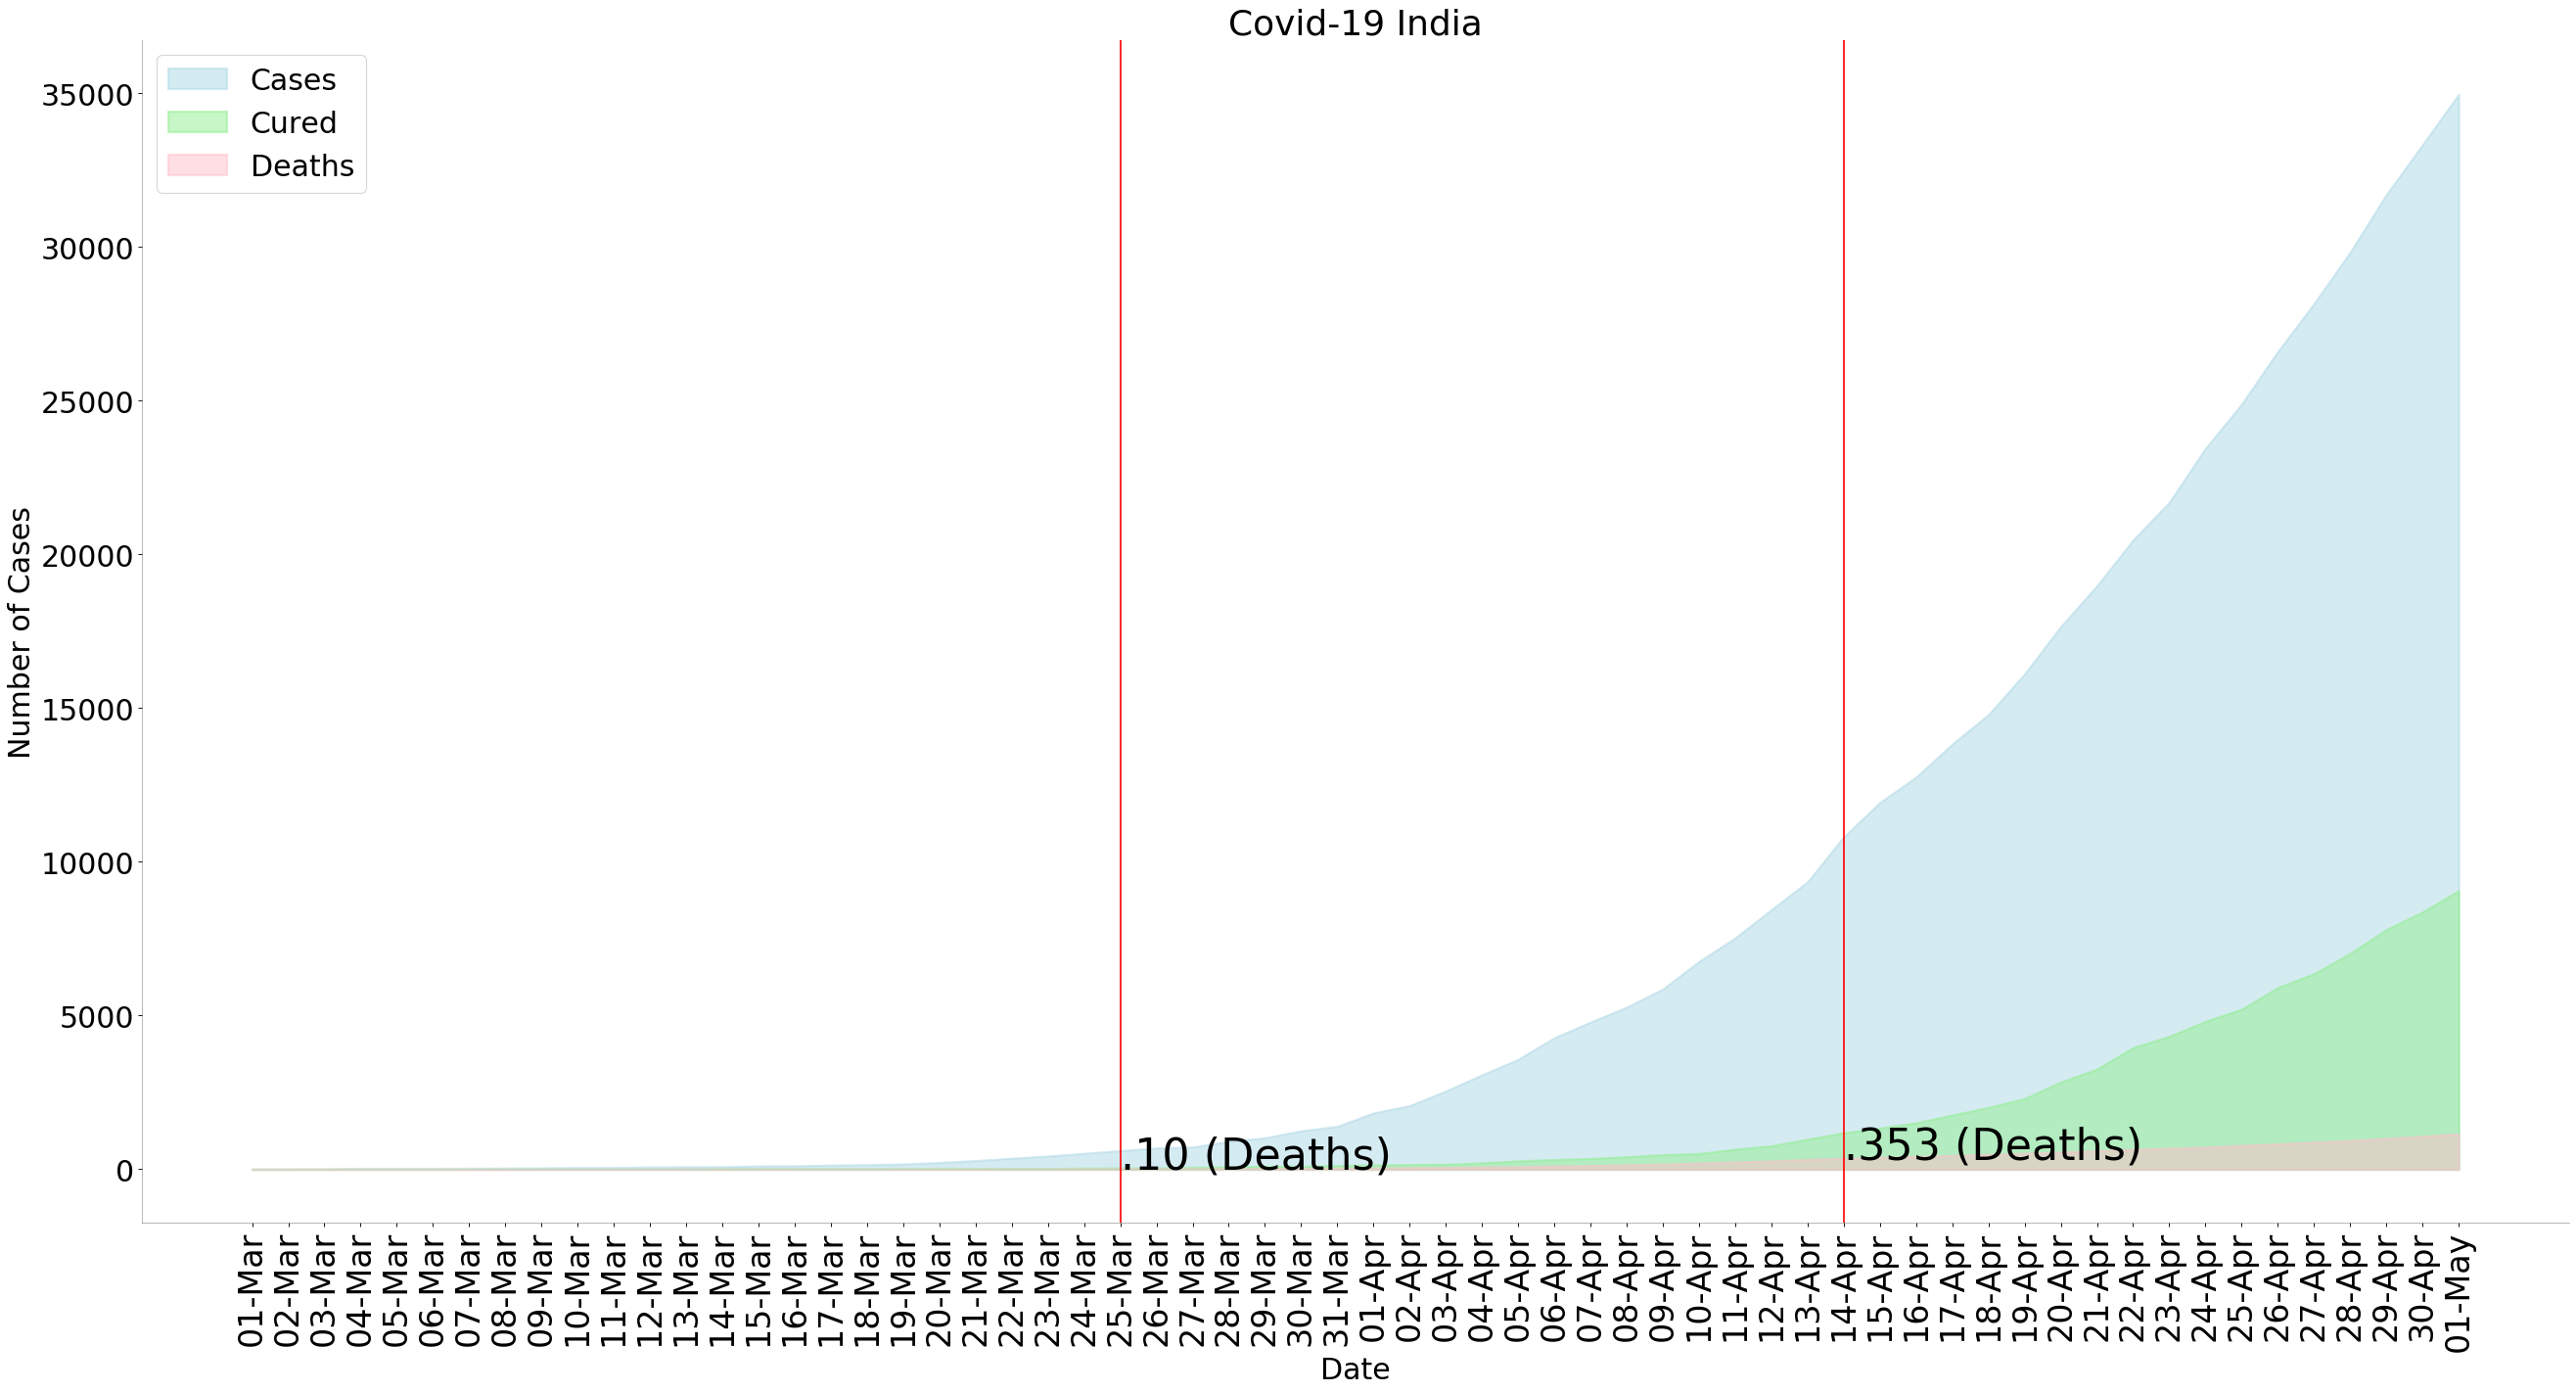

In [68]:
import matplotlib.pyplot as plt
import numpy as np
#fig  = plt.figure(figsize=(12,4),facecolor = 'white', dpi=100)
fig, ax = plt.subplots(1, 1, figsize=(40,20), dpi= 80)

ax.fill_between(dates, cases, y2=0, label='Cases', alpha=0.5, color='lightBlue', linewidth=2)
ax.fill_between(dates, cured, y2=0, label='Cured', alpha=0.5, color='lightgreen', linewidth=2)
ax.fill_between(dates, deaths, y2=0, label='Deaths', alpha=0.5, color='pink', linewidth=2)
plt.rcParams.update({'font.size': 27})
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.xticks(rotation='vertical',fontsize='30')
plt.xlabel('Date')
y=np.array(dates)
plt.axvline(x='25-Mar',color='red')
plt.axvline(x='14-Apr',color='red')
plt.ylabel('Number of Cases')
plt.title('Covid-19 India')
plt.legend(loc='upper left')
ax.annotate('.'+str(10)+' (Deaths)', xy=('25-Mar',10),fontsize='40')
ax.annotate('.'+str(353)+' (Deaths)', xy=('14-Apr',353),fontsize='40')
plt.savefig('covid_lockdown5')
plt.show()